In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1747811894.469062    3412 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14293 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9


In [4]:
import psutil

def get_ram_usage():
    return psutil.virtual_memory().used / (1024 ** 3) 

ram_usage_gb = get_ram_usage()
print(f"RAM Usage: {ram_usage_gb:.2f} GB")


RAM Usage: 3.70 GB


In [5]:
import psutil

# Get memory usage information
memory = psutil.virtual_memory()

# Total RAM in bytes
total_memory = memory.total

# RAM used in bytes
used_memory = memory.used

# RAM free in bytes
free_memory = memory.available

# RAM usage percentage
memory_percentage = memory.percent

print(f"Total Memory: {total_memory / (1024 ** 3)} GB")
print(f"Used Memory: {used_memory / (1024 ** 3)} GB")
print(f"Free Memory: {free_memory / (1024 ** 3)} GB")
print(f"Memory Usage: {memory_percentage}%")

Total Memory: 31.198062896728516 GB
Used Memory: 3.6951560974121094 GB
Free Memory: 27.043277740478516 GB
Memory Usage: 13.3%


In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed May 21 09:18:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.133.07             Driver Version: 570.133.07     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 Ti     Off |   00000000:01:00.0 Off |                  N/A |
|  0%   34C    P8             10W /  165W |     126MiB /  16380MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 33.5 gigabytes of available RAM

You are using a high-RAM runtime!


In [8]:
import os
HOME = os.getcwd()
print(HOME)

/home/mike/Desktop/codes/projects/AI_PRJ/TrueDent-AI/TrueDent/01_detection_model/model


In [9]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.141 🚀 Python-3.11.2 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 15956MiB)
Setup complete ✅ (12 CPUs, 31.2 GB RAM, 75.4/226.7 GB disk)


In [10]:
from ultralytics import YOLO

from IPython.display import display, Image

In [43]:
from ultralytics import YOLO

model = YOLO('yolov8n.yaml') 

results = model.predict(
    source='data/yolo_train_dataset/train/images',
    iou=0.7,
    conf=0.5,
    save=True,
    device=0
)



image 1/894 /home/mike/Desktop/codes/projects/AI_PRJ/TrueDent-AI/TrueDent/01_detection_model/model/data/yolo_train_dataset/train/images/cate1-00002_jpg.rf.69248919c2bc1558c19f755d875c1771.jpg: 640x640 (no detections), 4.5ms
image 2/894 /home/mike/Desktop/codes/projects/AI_PRJ/TrueDent-AI/TrueDent/01_detection_model/model/data/yolo_train_dataset/train/images/cate1-00002_jpg.rf.92038c2caa928c247e3671c407fc613c.jpg: 640x640 (no detections), 4.8ms
image 3/894 /home/mike/Desktop/codes/projects/AI_PRJ/TrueDent-AI/TrueDent/01_detection_model/model/data/yolo_train_dataset/train/images/cate1-00002_jpg.rf.e0c956c6468ef96b53c862916e6fb6e8.jpg: 640x640 (no detections), 4.8ms
image 4/894 /home/mike/Desktop/codes/projects/AI_PRJ/TrueDent-AI/TrueDent/01_detection_model/model/data/yolo_train_dataset/train/images/cate1-00005_jpg.rf.3a82543ca8d87b55292df4fd9e7a289e.jpg: 640x640 (no detections), 4.6ms
image 5/894 /home/mike/Desktop/codes/projects/AI_PRJ/TrueDent-AI/TrueDent/01_detection_model/model/data

In [44]:
cls=[]
for result in results :
  boxes =result.boxes
  classes=boxes.cls
  cls.append(classes)

for i in range(len(cls)):
  cls[i]=cls[i].cpu().numpy()

In [45]:
box=[]

for result in results :
  boxes =result.boxes
  boxes=boxes.xywh
  box.append(boxes)


for i in range(len(box)):
  box[i]=box[i].cpu().numpy()


box[0]

array([], shape=(0, 4), dtype=float32)

In [46]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [47]:
import numpy as np
bin_masks=[]
for j in range(len(box)):
   boxes1 = box[j]
   classes1=cls[j]
   boxes1_list=boxes1.tolist()
   classes1_list=classes1.tolist()
   binary_map = np.zeros((32,640,640), dtype=np.uint8)
   for box1, class1 in zip(boxes1_list,classes1_list):
       x,y,w,h=box1
       x1, y1 = round(x), round(y)
       x2, y2 = round(x+w), round(y+h)
       binary_map[int(class1), y1:y2, x1:x2] = 1

   bin_masks.append(binary_map)

del results, cls, box
bin_masks[0]



array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [48]:
def remove_nan(bb):
    bb=np.nan_to_num(bb, nan=0)
    return bb


In [49]:
bin_masks=  list(map(remove_nan, bin_masks))

In [51]:
import os

images_folder = 'data/yolo_train_dataset/train/images'
labels_folder = 'data/yolo_train_dataset/train/labels'

image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg')]
label_files = [f for f in os.listdir(labels_folder) if f.endswith('.txt')]

image_files.sort()
label_files.sort()

image_label_pairs = []

for image_file in image_files:
    image_path = os.path.join(images_folder, image_file)
    label_file = image_file.replace('.jpg', '.txt')
    label_path = os.path.join(labels_folder, label_file)

    if os.path.isfile(label_path):
        image_label_pairs.append((image_path, label_path))

for image_path, label_path in image_label_pairs:
    print("Image:", image_path)
    print("Label:", label_path)
    print()

del image_files, label_files


Image: data/yolo_train_dataset/train/images/cate1-00002_jpg.rf.69248919c2bc1558c19f755d875c1771.jpg
Label: data/yolo_train_dataset/train/labels/cate1-00002_jpg.rf.69248919c2bc1558c19f755d875c1771.txt

Image: data/yolo_train_dataset/train/images/cate1-00002_jpg.rf.92038c2caa928c247e3671c407fc613c.jpg
Label: data/yolo_train_dataset/train/labels/cate1-00002_jpg.rf.92038c2caa928c247e3671c407fc613c.txt

Image: data/yolo_train_dataset/train/images/cate1-00002_jpg.rf.e0c956c6468ef96b53c862916e6fb6e8.jpg
Label: data/yolo_train_dataset/train/labels/cate1-00002_jpg.rf.e0c956c6468ef96b53c862916e6fb6e8.txt

Image: data/yolo_train_dataset/train/images/cate1-00005_jpg.rf.3a82543ca8d87b55292df4fd9e7a289e.jpg
Label: data/yolo_train_dataset/train/labels/cate1-00005_jpg.rf.3a82543ca8d87b55292df4fd9e7a289e.txt

Image: data/yolo_train_dataset/train/images/cate1-00005_jpg.rf.4b952e7932d0d8febfddcee089168d68.jpg
Label: data/yolo_train_dataset/train/labels/cate1-00005_jpg.rf.4b952e7932d0d8febfddcee089168d68.

In [52]:
from skimage import exposure

def apply_clahe(image, clip_limit=0.02):
    image_float = image.astype(float) / 255.0

    image_clahe = exposure.equalize_adapthist(image_float, clip_limit=clip_limit)

    image_clahe = (image_clahe * 255).astype(image.dtype)

    return image_clahe

In [68]:
from PIL import Image
import numpy as np

image_data = []
mask_data = []  # bounding boxes (class_id, x_center, y_center, width, height)

for img_file, label_file in image_label_pairs:
    # Cargar imagen
    img = Image.open(img_file)
    img_data = np.array(img, dtype=np.float16)
    img_data = apply_clahe(img_data)  # dejalo si usás CLAHE, si no, comentalo
    image_data.append(img_data)

    # Cargar bounding boxes desde .txt
    with open(label_file, 'r') as f:
        bboxes = []
        for line in f:
            parts = line.strip().split()
            if len(parts) == 5:
                class_id, x_center, y_center, width, height = map(float, parts)
                bboxes.append((int(class_id), x_center, y_center, width, height))
        mask_data.append(bboxes)



In [69]:
dataset= list(zip(image_data,mask_data,bin_masks))

print("Images:", len(image_data))
print("Masks:", len(mask_data))
print("Bin Masks:", len(bin_masks))


Images: 894
Masks: 894
Bin Masks: 894


In [70]:
import cv2

def resize_img(input_image,input_mask,input_bb):
  input_image = cv2.resize(input_image, (512,512), interpolation=cv2.INTER_NEAREST)
  input_bb = np.transpose(input_bb, axes=[1, 2, 0])
  input_bb = cv2.resize(input_bb, (512,512), interpolation=cv2.INTER_NEAREST)
  input_mask = np.transpose(input_mask, axes=[1, 2, 0])
  input_mask = cv2.resize(input_mask, (512,512), interpolation=cv2.INTER_NEAREST)
  return input_image,input_mask,input_bb



In [ ]:
def augment(input_image,input_mask,input_bb):
    if np.random.uniform() > 0.5:
        input_image = np.fliplr(input_image)
        input_mask = np.fliplr(input_mask)
        input_bb = np.fliplr(input_bb)
        
    return input_image,input_mask,input_bb

In [72]:
def normalize(image_data):
    image_data = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data))
    return image_data

In [79]:
def load_image_train(datapoint):
    input_image = np.array(datapoint[0])
    input_mask = np.array(datapoint[1])
    input_bb = np.array(datapoint[2])
    input_image, input_mask, input_bb = resize_img(input_image, input_mask, input_bb)
    input_image = normalize(input_image)
    input_image, input_mask, input_bb = augment(input_image, input_mask, input_bb)


    return input_image, input_mask, input_bb

In [80]:
new_dataset=list(map(load_image_train, dataset))

In [83]:
import random

# Define the dataset and categories
dataset = new_dataset
categories = [24, 72, 15, 32, 37, 30, 33, 140, 7, 35]

# Initialize the test and train datasets
test_dataset = []
train_dataset = []

# Set the random seed for reproducibility
random.seed(42)
start_idx = 0

print("Dataset length: ", len(dataset))

# Loop through each category
for i, category_count in enumerate(categories):
    end_idx = start_idx + category_count
    
    # Slice de la categoría
    category_data = dataset[start_idx:end_idx]
    
    # Shuffle dentro de esa categoría
    random.shuffle(category_data)
    
    # 20% para test
    num_test = int(0.2 * category_count)
    
    test_images = category_data[:num_test]
    train_images = category_data[num_test:]
    
    test_dataset.extend(test_images)
    train_dataset.extend(train_images)
    
    print(f'Category {i + 1}: {num_test} images in the test dataset')
    
    start_idx = end_idx

print(len(train_dataset))

Dataset length:  894
Category 1: 4 images in the test dataset
Category 2: 14 images in the test dataset
Category 3: 3 images in the test dataset
Category 4: 6 images in the test dataset
Category 5: 7 images in the test dataset
Category 6: 6 images in the test dataset
Category 7: 6 images in the test dataset
Category 8: 28 images in the test dataset
Category 9: 1 images in the test dataset
Category 10: 7 images in the test dataset
343


In [84]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [85]:
obj=train_dataset[10]
image=obj[0]
mask=obj[1]
bb=obj[2]

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

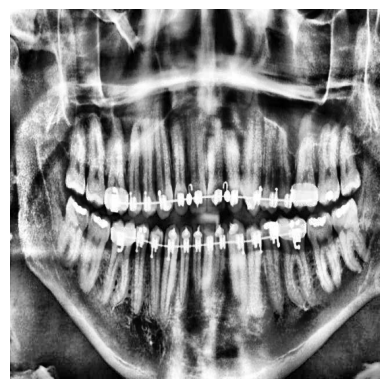

In [86]:
pil_image = tf.keras.preprocessing.image.array_to_img(image)
plt.imshow(pil_image)
plt.axis('off')

In [87]:
colormap = ListedColormap(['#000000'] * 32)

combined_image = np.zeros((512,512, 3), dtype=np.uint16)

for i in range(mask.shape[2]):
    image = mask[:,:,i]

    if i == 0 or i == 1 or i == 8 or i == 9 or i == 16 or i == 17 or i == 24 or i == 25:
      colormap.colors[i] = '#2828a2'
    elif i == 2 or i == 10 or i == 18 or i == 26:
      colormap.colors[i] = '#09c5c5'
    elif i == 3 or i == 4 or i == 11 or i == 12 or i == 19 or i == 20 or i == 27 or i == 28:
      colormap.colors[i] = '#1caf1c'
    elif i == 5 or i == 6 or i == 7:
      colormap.colors[i] = '#eeee25'
    elif i == 13 or i == 14 or i == 15:
      colormap.colors[i] = '#eeee25'
    elif i == 21 or i == 22 or i == 23:
      colormap.colors[i] = '#eeee25'
    elif i == 29 or i == 30 or i == 31:
      colormap.colors[i] = '#eeee25'

    hex_color = colormap.colors[i]
    rgb_color = np.array([int(hex_color[i:i+2], 16) for i in (1, 3, 5)], dtype=np.uint16)

    mask_new = np.where(image > 0, 1, 0)

    rgb_color_tiled = np.tile(rgb_color, (512, 512, 1))

    colored_image = mask_new[:, :, np.newaxis] * rgb_color_tiled

    combined_image = combined_image + colored_image

    combined_image = combined_image.astype(np.uint8)

plt.imshow(combined_image)
plt.axis('off')
plt.show()


IndexError: tuple index out of range

In [ ]:
colormap = ListedColormap(['#000000'] * 32)

combined_image = np.zeros((512,512, 3), dtype=np.uint16)

for i in range(bb.shape[2]):
    image = bb[:,:,i]

    if i == 0 or i == 1 or i == 8 or i == 9 or i == 16 or i == 17 or i == 24 or i == 25:
      colormap.colors[i] = '#2828a2'
    elif i == 2 or i == 10 or i == 18 or i == 26:
      colormap.colors[i] = '#09c5c5'
    elif i == 3 or i == 4 or i == 11 or i == 12 or i == 19 or i == 20 or i == 27 or i == 28:
      colormap.colors[i] = '#1caf1c'
    elif i == 5 or i == 6 or i == 7:
      colormap.colors[i] = '#eeee25'
    elif i == 13 or i == 14 or i == 15:
      colormap.colors[i] = '#eeee25'
    elif i == 21 or i == 22 or i == 23:
      colormap.colors[i] = '#eeee25'
    elif i == 29 or i == 30 or i == 31:
      colormap.colors[i] = '#eeee25'

    hex_color = colormap.colors[i]
    rgb_color = np.array([int(hex_color[i:i+2], 16) for i in (1, 3, 5)], dtype=np.uint16)

    mask_new = np.where(image > 0, 1, 0)

    rgb_color_tiled = np.tile(rgb_color, (512,512, 1))

    colored_image = mask_new[:, :, np.newaxis] * rgb_color_tiled

    combined_image = combined_image + colored_image

    combined_image = combined_image.astype(np.uint8)

plt.imshow(combined_image)
plt.axis('off')
plt.show()


In [ ]:
def convert_to_array(data):
    image=data[0]
    bb=data[2]
    image=image
    final_array=np.concatenate((bb,image),axis=2)
    return final_array

In [ ]:
train_list=list(map(convert_to_array,train_dataset))

In [ ]:
# Test DataSet
test_list = list(map(convert_to_array,test_dataset))

In [ ]:
# Full Dataset
full_list = list(map(convert_to_array,dataset))

In [ ]:
image,mask,bb = zip(*train_dataset)

In [ ]:
# Test DataSet
image_test,mask_test,bb_test = zip(*test_dataset)

In [ ]:
# Full DataSet
image_full,mask_full,bb_full = zip(*dataset)

In [ ]:
drop_rate = 0.12
from tensorflow.keras.metrics import  Precision, Recall
from tensorflow import keras
def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (35,))
    
    # ... (Encoder) ...
    inputs0=inputs[ :, :, :, 32:]
    inputs1=inputs[ :, :, :, :32]
    skip_connections = []  # To store feature maps from each encoder block
    bb_out = []
    # Entry block
    x = keras.layers.Conv2D(64, 3, strides=1, padding="same")(inputs0)
    x = keras.layers.Activation("relu")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.SpatialDropout2D(drop_rate)(x)

    x = keras.layers.Conv2D(64, 3, strides=1, padding="same")(x)
    x = keras.layers.Activation("relu")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.SpatialDropout2D(drop_rate)(x)

    skip_connections.append(x)
    
    for filters in [128,256,512,1024]: #1024
        x = keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
        x = keras.layers.Conv2D(filters, 3, padding="same")(x)
        x = keras.layers.Activation("relu")(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.SpatialDropout2D(drop_rate)(x)
        
        x = keras.layers.Conv2D(filters, 3, padding="same")(x)
        x = keras.layers.Activation("relu")(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.SpatialDropout2D(drop_rate)(x)
        skip_connections.append(x)

        
    bb = tf.keras.layers.MaxPool2D(pool_size=(1,1), strides=1)(inputs1)
    bb = tf.keras.layers.Conv2D(filters=64,kernel_size=(3, 3),padding="same")(bb)
    bb = tf.keras.layers.Conv2D(filters=64,kernel_size=(3, 3),padding="same",activation=tf.nn.sigmoid)(bb)
    bb_out.append(bb)
    for idx, filters in enumerate([128, 256,512]): #512
        bb = tf.keras.layers.MaxPool2D(pool_size=(pow(2,idx+1),pow(2,idx+1)), strides=pow(2,idx+1))(inputs1)
        bb = tf.keras.layers.Conv2D(filters=filters,kernel_size=(3, 3),padding="same")(bb)
        bb = tf.keras.layers.Conv2D(filters=filters,kernel_size=(3, 3),padding="same",activation=tf.nn.sigmoid)(bb)
        bb_out.append(bb) 
        
    skip_connections.pop()
    for filters in [512,256,128]: #512
        x = keras.layers.Conv2DTranspose(filters, 3,strides=2, padding="same")(x)
        x = keras.layers.Activation("relu")(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.SpatialDropout2D(drop_rate)(x)
        skip_connection = skip_connections.pop()
        bb_layer = bb_out.pop()
        out = tf.multiply(skip_connection,bb_layer)
        x = keras.layers.concatenate([x, out])  
        
        x = keras.layers.Conv2D(filters, 3, padding="same")(x)
        x = keras.layers.Activation("relu")(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.SpatialDropout2D(drop_rate)(x)
        
        x = keras.layers.Conv2D(filters, 3, padding="same")(x)
        x = keras.layers.Activation("relu")(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.SpatialDropout2D(drop_rate)(x)

    filters=64   
    x = keras.layers.Conv2DTranspose(filters, 3,strides=2, padding="same")(x)
    x = keras.layers.Activation("relu")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.SpatialDropout2D(drop_rate)(x)
    skip_connection = skip_connections.pop()
    bb_layer = bb_out.pop()
    out = tf.multiply(skip_connection,bb_layer)
    x = keras.layers.concatenate([x, out])  
        
    x = keras.layers.Conv2D(filters, 3, padding="same")(x)
    x = keras.layers.Activation("relu")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.SpatialDropout2D(drop_rate)(x)
        
    x = keras.layers.Conv2D(filters, 3, padding="same")(x)
    x = keras.layers.Activation("relu")(x)
    x = keras.layers.BatchNormalization()(x)

    outputs = keras.layers.Conv2D(num_classes, 1, activation="softmax", padding="same")(
        x
    )
    model = keras.Model(inputs, outputs)
    return model


In [ ]:
import tensorflow as tf

def dice_loss_with_l2_regularization(target, predicted, epsilon=1e-7, l2_weight=0.1):
    intersection = tf.reduce_sum(predicted * target, axis=[1, 2]) 
    predicted_square = tf.square(predicted)
    target_square = tf.square(target)
    union = tf.reduce_sum(predicted_square, axis=[1, 2]) + tf.reduce_sum(target_square, axis=[1, 2])
    dice = (2 * intersection + epsilon) / (union + epsilon)
    mean_dice_loss = tf.reduce_mean(dice)
    
    l2_norm = tf.reduce_sum(tf.square(predicted - target), axis=[1, 2])
    l2_regularization = l2_weight * tf.reduce_mean(l2_norm)
    
    total_loss = mean_dice_loss + l2_regularization
    return total_loss


In [ ]:
import tensorflow as tf

def dice_coef(target, predicted, epsilon=1e-7):
    predicted = tf.where(predicted<0.51,0.00,1.00)
    intersection = tf.reduce_sum(predicted * target, axis=[1, 2]) 
    predicted_square = tf.square(predicted)
    target_square = tf.square(target)
    union = tf.reduce_sum(predicted_square, axis=[1, 2]) + tf.reduce_sum(target_square, axis=[1, 2])
    dice = (2 * intersection + epsilon) / (union + epsilon)
    mean_dice_loss = -tf.reduce_mean(dice)
    return -mean_dice_loss

In [ ]:
import tensorflow as tf

def molar_dice_coef(target, predicted, epsilon=1e-7):
    predicted = tf.where(predicted<0.5,0.00,1.00)
    intersection = tf.reduce_sum(predicted * target, axis=[1, 2]) 
    predicted_square = tf.square(predicted)
    target_square = tf.square(target)
    union = tf.reduce_sum(predicted_square, axis=[1, 2]) + tf.reduce_sum(target_square, axis=[1, 2])
    dice = (2 * intersection + epsilon) / (union + epsilon)
    dice = tf.reduce_mean(dice, axis = 0)
    mean_dice_loss = (dice[5]+dice[6]+dice[7]+dice[13]+dice[14]+dice[15]+dice[21]+dice[22]+dice[23]+dice[29]+dice[30]+dice[31])/12
    return mean_dice_loss

In [ ]:
import tensorflow as tf

def pre_molar_dice_coef(target, predicted, epsilon=1e-7):
    predicted = tf.where(predicted<0.5,0.00,1.00)
    intersection = tf.reduce_sum(predicted * target, axis=[1, 2]) 
    predicted_square = tf.square(predicted)
    target_square = tf.square(target)
    union = tf.reduce_sum(predicted_square, axis=[1, 2]) + tf.reduce_sum(target_square, axis=[1, 2])
    dice = (2 * intersection + epsilon) / (union + epsilon)
    dice = tf.reduce_mean(dice, axis = 0)
    mean_dice_loss = (dice[3]+dice[4]+dice[11]+dice[12]+dice[19]+dice[20]+dice[27]+dice[28])/8
    return mean_dice_loss

In [ ]:
import tensorflow as tf

def canine_dice_coef(target, predicted, epsilon=1e-7):
    predicted = tf.where(predicted<0.5,0.00,1.00)
    intersection = tf.reduce_sum(predicted * target, axis=[1, 2]) 
    predicted_square = tf.square(predicted)
    target_square = tf.square(target)
    union = tf.reduce_sum(predicted_square, axis=[1, 2]) + tf.reduce_sum(target_square, axis=[1, 2])
    dice = (2 * intersection + epsilon) / (union + epsilon)
    dice = tf.reduce_mean(dice, axis = 0)
    mean_dice_loss = (dice[2]+dice[10]+dice[18]+dice[26])/4
    return mean_dice_loss

In [ ]:
import tensorflow as tf

def incisor_dice_coef(target, predicted, epsilon=1e-7):
    predicted = tf.where(predicted<0.5,0.00,1.00)
    intersection = tf.reduce_sum(predicted * target, axis=[1, 2]) 
    predicted_square = tf.square(predicted)
    target_square = tf.square(target)
    union = tf.reduce_sum(predicted_square, axis=[1, 2]) + tf.reduce_sum(target_square, axis=[1, 2])
    dice = (2 * intersection + epsilon) / (union + epsilon)
    dice = tf.reduce_mean(dice, axis = 0)
    print(dice)
    mean_dice_loss = (dice[0]+dice[1]+dice[8]+dice[9]+dice[16]+dice[17]+dice[24]+dice[25])/8
    return mean_dice_loss

In [ ]:
import random

# Define the dataset and categories
categories = [20, 58, 12, 26, 30, 24, 27, 112, 6, 28]


# Initialize the test and train datasets
train_x = [] 
valid_x = [] 
train_y = [] 
valid_y = []

# Set the random seed for reproducibility
random.seed(42)
sum = 0
# Loop through each category
for i, category_count in enumerate(categories):
    # Shuffle the images for the current category
    random.shuffle(dataset[sum:category_count])  # Shuffle only within the current category
    
    # Calculate the number of images for testing (20%)
    num_test_images = int(0.1 * category_count)
    
    # Split the images into test and train
    test_images = train_list[sum:sum + num_test_images]
    train_images = train_list[sum + num_test_images:sum + category_count]

    testy_images = mask[sum:sum + num_test_images]
    trainy_images = mask[sum + num_test_images:sum + category_count]
    
    # Update the test and train datasets
    valid_x.extend(test_images)
    train_x.extend(train_images)

    valid_y.extend(testy_images)
    train_y.extend(trainy_images)
    
    # Print the category and the number of images in the test dataset
    print(f'Category {i + 1}: {num_test_images} images in the valid dataset')
    sum+=category_count


In [ ]:
 with tf.device('/CPU:0'):
    train_dataset=tf.data.Dataset.from_tensor_slices((train_x, train_y))
    valid_dataset=tf.data.Dataset.from_tensor_slices((valid_x, valid_y))

In [ ]:
def cast_to_tensor(data, label):
    label=tf.cast(label, tf.float32)
    return data, label
with tf.device('/CPU:0'):
    train_dataset= train_dataset.map(cast_to_tensor)
    valid_dataset= valid_dataset.map(cast_to_tensor)

In [ ]:
 train_dataset1= train_dataset.batch(2)
 valid_dataset1= valid_dataset.batch(2)

In [ ]:
from sklearn.model_selection import train_test_split

test_x, nil_x, test_y, nil_y= train_test_split(test_list, mask_test, test_size=0.00001)

In [ ]:
# Test DataSet
with tf.device('/CPU:0'):
    test_dataset=tf.data.Dataset.from_tensor_slices((test_x, test_y))

In [ ]:
# Test DataSet
def cast_to_tensor(data, label):
    label=tf.cast(label, tf.float32)
    return data, label
with tf.device('/CPU:0'):
    test_dataset= test_dataset.map(cast_to_tensor)

In [ ]:
# Test DataSet
test_dataset1= test_dataset.batch(2)

In [ ]:
# Build model
import tensorflow as tf
from tensorflow.keras.metrics import  Precision, Recall
from tensorflow.keras.callbacks import Callback


class ReduceLearningRate(Callback):
    def __init__(self, monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1):
        super(ReduceLearningRate, self).__init__()
        self.monitor = monitor
        self.factor = factor
        self.patience = patience
        self.min_lr = min_lr
        self.verbose = verbose
        self.wait = 0
        self.best_loss = float('inf')
        self.reduce_lr = self.min_lr

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get(self.monitor)

        if current_loss is None:
            raise ValueError(f"Monitoring metric '{self.monitor}' is not available.")

        if current_loss < self.best_loss:
            self.best_loss = current_loss
            self.wait = 0
            self.reduce_lr = self.model.optimizer.learning_rate
        else:
            self.wait += 1
            if self.wait >= self.patience:
                if self.reduce_lr > self.min_lr:
                    self.reduce_lr = self.reduce_lr*self.factor
                    self.model.optimizer.learning_rate.assign(self.reduce_lr)
                    if self.verbose > 0:
                        print(f"\nEpoch {epoch + 1}: Reducing learning rate to {self.reduce_lr}")
                self.wait = 0

lr_callback = ReduceLearningRate(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)



model = get_model(img_size=(512, 512), num_classes=32)

model.compile(
    optimizer=keras.optimizers.Adam(0.0003),
    loss =dice_loss_with_l2_regularization,
     metrics = [ Precision(), Recall(),dice_coef,incisor_dice_coef,molar_dice_coef,canine_dice_coef, pre_molar_dice_coef]
)


In [ ]:
#Train the model, doing validation at the end of each epoch.
history = model.fit(
    train_dataset1, 
    epochs=60, 
    validation_data=valid_dataset1, 
    callbacks=[lr_callback]  # Add the lr_callback to the callbacks list
)


In [ ]:
object= test_dataset1.take(1)
def extract_image(image,label):
    return image
image=object.map(extract_image)
predictions=model.predict(image)
print("img")
print(predictions)

In [ ]:
output=predictions[0,:,:,:]
output= np.where(output<0.5,0,1)

In [ ]:
channel = output[:,:,2]
plt.imshow(channel, cmap="gray")
plt.show()

In [ ]:
colormap = ListedColormap(['#000000'] * 32)

combined_image = np.zeros((512,512, 3), dtype=np.uint16)

for i in range(output.shape[2]):
    image = output[:,:,i]

    if i == 0 or i == 1 or i == 8 or i == 9 or i == 16 or i == 17 or i == 24 or i == 25:
      colormap.colors[i] = '#2828a2'
    elif i == 2 or i == 10 or i == 18 or i == 26:
      colormap.colors[i] = '#09c5c5'
    elif i == 3 or i == 4 or i == 11 or i == 12 or i == 19 or i == 20 or i == 27 or i == 28:
      colormap.colors[i] = '#1caf1c'
    elif i == 5 or i == 6 or i == 7:
      colormap.colors[i] = '#eeee25'
    elif i == 13 or i == 14 or i == 15:
      colormap.colors[i] = '#eeee25'
    elif i == 21 or i == 22 or i == 23:
      colormap.colors[i] = '#eeee25'
    elif i == 29 or i == 30 or i == 31:
      colormap.colors[i] = '#eeee25'

    hex_color = colormap.colors[i]
    rgb_color = np.array([int(hex_color[i:i+2], 16) for i in (1, 3, 5)], dtype=np.uint16)

    mask_new = np.where(image > 0, 1, 0)

    rgb_color_tiled = np.tile(rgb_color, (512,512, 1))

    colored_image = mask_new[:, :, np.newaxis] * rgb_color_tiled

    combined_image = combined_image + colored_image

    combined_image = combined_image.astype(np.uint8)

plt.imshow(combined_image)
plt.axis('off')
plt.show()

In [ ]:
#save the weights of the model
model.save('...')